# DATA & ALGORITHM PREPARATION

## Data Pre-processing

### Data cleaning

In [2]:
cd WoS_Records/savedrecs

mv savedrecs.txt "savedrecs(0).txt"

for i in {0..11}
do
    ## Remove the "\"" characters to make the files readable & Change them into tsv format
    sed 's/"//g' "savedrecs($i).txt" > "savedrecs($i).tsv";
    ## Remove the original files
    rm "savedrecs($i).txt";
    ## Rename in order
    mv "savedrecs($i).tsv" "savedrecs"`echo "$i+1" | bc`".tsv";
done

ls

savedrecs10.tsv
savedrecs11.tsv
savedrecs12.tsv
savedrecs1.tsv
savedrecs2.tsv
savedrecs3.tsv
savedrecs4.tsv
savedrecs5.tsv
savedrecs6.tsv
savedrecs7.tsv
savedrecs8.tsv
savedrecs9.tsv


### Data reshaping

{5817, 67}
PT   AU   BA   BE   GP   AF   BF   CA

TI   SO   SE   BS   LA   DT   CT   CY

CL   SP   HO   DE   ID   AB   C1   RP

EM   RI   OI   FU   FX   CR   NR   TC

Z9   U1   U2   PU   PI   PA   SN   EI

BN   J9   JI   PD   PY   VL   IS   PN

SU   SI   MA   BP   EP   AR   DI   D2

EA   PG   WC   SC   GA   UT   PM   OA
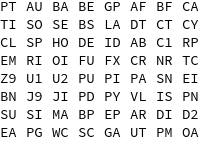

In [1]:
(*Import the WoS Records*)
data=
Table[
Import[
"~/Project/Battlefield/Explicit/Presynaptic_Omics_Review/WoS_Records/savedrecs/savedrecs"<>ToString@i<>".tsv",
"Data"
],
{i,12}
];


(*Gather records together & Delete duplicates of header lines*)
data=DeleteDuplicates@Flatten[data[[1;;12,All,1;;67]],1];

(*Confirm the shape of the dataset - 5767 records obtained in all*)
Dimensions@data

(*Make the database as an association*)
data=Association[Transpose@data/.{x_String,y__}->Rule[x,{y}]];

(*Items to study*)
Grid@Partition[Keys@data,8]

## Algorithm Designing

### Algorithm for visualization

In [11]:
VisualTemplate[data_,function_,plotlabel_,scalelabel_,plottheme_,options___]:=
function[
data,
options,
PlotLabel->Style[plotlabel,Bold,Black],
AxesLabel->scalelabel,
FrameLabel->scalelabel,
LabelStyle->Directive[FontFamily->"TimesNewRoman",FontColor->Black],
PlotTheme->plottheme
]//Magnify

Subplot[p_, {n_, s_}] :=
 Block[
  {g},
  g =
   Overlay[
    {
     p,
     Style[s, 
      Directive[Bold, FontFamily -> "Helvetica", FontSize -> 24]]
     },
    ImageSize -> {421, 421}
    ];
  Export["Figure." <> n <> s <> ".pdf", g];
  g
  ]
Subplot[p_, {n_, s_}, size_] :=
 Block[
  {g},
  g =
   Overlay[
    {
     p,
     Style[s, 
      Directive[Bold, FontFamily -> "Helvetica", FontSize -> 24]]
     },
    ImageSize -> size
    ];
  Export["Figure." <> n <> s <> ".pdf", g];
  g
  ]

Rot[l_]:=
Rotate[l,-Pi/2]

# MULTIPLE ANALYSIS

## Explorational Data Analysis

### structural exploration

Legended[-Graphics-, Placed[PointLegend[{Directive[PointSize[0.00476667], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.00476667], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[1.6]], Directive[PointSize[0.00476667], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[1.6]], 
 
>      Directive[PointSize[0.00476667], RGBColor[0.922526, 0.385626, 0.209179], 
 
>       AbsoluteThickness[1.6]], Directive[PointSize[0.00476667], 
 
>       RGBColor[0.528488, 0.470624, 0.701351], AbsoluteThickness[1.6]]}, 
 
                                     x
>     {Piecewise[{{0.0262151 0.973785 , x >= 0}}], 
 
                                    x
>      Piecewise[{{0.037209 0.962791 , x >= 0}}], 
 
                                  x
>      Piecewise[{{0.02882 0.97118 , x >= 0}}], 
 
                                     x
>      Piecewise[{{0.0480213 0.951979 , x >= 0}}], 
 
                                     x
>      Piecewise[{{0.0509259 0.949074 , x >= 0}}]}, 
 
>     LegendMarkers -> 
 
>      {{None, Automatic}, {None, Automatic}, {None, Automatic}, {None, Automatic}, 
 
>       {None, Automatic}}, Joined -> {False, False, False, False, False}, 
 
>     LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
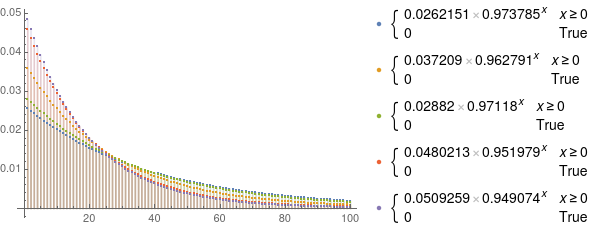

In [96]:
DiscretePlot[
Table[
PDF[
EstimatedDistribution[
GatherBy[
SortBy[
Transpose@
{
StringCount[data@"WC",";"]+1,
data@"TC"
},
First
],
First
][[i,All,2]],
GeometricDistribution[p]
],
x
],
{i,5}
]//Evaluate,
{x,100},
PlotLegends->"Expressions"
]

### algorithmic exploration

In [34]:
Position[StringCases[data@"WC","Material"],{_}]

{{603}, {1284}, {1480}, {1572}, {5283}}

MixtureDistribution[{0.429686, 0.570314}, 
 
>   {GeometricDistribution[0.133967], GeometricDistribution[0.0169968]}]
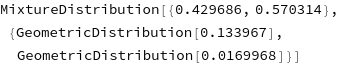

In [51]:
FindDistribution@data@"TC"

## Data Mining

### Analyze the publishing date distribution

In [13]:
Block[
{date=Interpreter["Date"][Transpose@Lookup[data,{"PD","PY"}]/.{d_,y_}:>StringRiffle@{d,ToString@y}]},
date=date//.{r___,c_,Failure[__],l___}->{r,c,c,l};
Export["Synaptic_Omics_date_list.tsv",date]
]

Synaptic_Omics_date_list.tsv

[It's a root cell, which need to be run at each opening.]

In [18]:
date=ToExpression@Flatten@Import@"Synaptic_Omics_date_list.tsv"//.DateObject[{y_},__]:>
DateObject[{y,1,RandomInteger@{1,QuantityMagnitude@DateDifference[DateObject[{y}],DateObject[{y+1}]]}}]/.
DateObject[{y_,m_},__]:>
DateObject[{y,m,RandomInteger@{1,QuantityMagnitude@DateDifference[DateObject[{y,m}],DateObject[{y,m+1}]]}}];

### Make the rules list of journal-IF pairs & area-scale pairs

In [25]:
journalifrules=
Rule@@@Import["JournalHomeGrid.csv",{"Data",3;;-3,{3,5}}];

areascalerules=
Thread@
Rule[
Keys@Take[Reverse@Sort@Counts@Flatten@StringSplit[data["SC"],"; "],20],
Partition[Reverse@Flatten@Import@"FieldPublicationAmount.tsv",13][[All,-4]]
];

## Data Visualization

### Analysis for discipline & journal distribution

Magnify[Legended[-Graphics-, {Placed[BarLegend[{TemperatureMap, 
 
               22095479        811039
>        {-Log[--------], -Log[------]}}, 
                  64            251
 
>       {LabelStyle -> 
 
>         {{Directive[FontFamily -> TimesNewRoman]}, 
 
>          {Directive[FontFamily -> TimesNewRoman]}}, 
 
>        LegendLabel -> 
 
                                                                -Pi
>         Placed[Rotate[ln(Num. of Art./Total Disc. Art. Num.), ---], Right], 
                                                                 2
 
                                                         360
>        LegendLayout -> Column, LegendMarkerSize -> -----------, 
                                                     GoldenRatio
 
>        Charting`TickSide -> Right, ColorFunctionScaling -> True}], After, Identity]}]]
Fig1a.pdf
Magnify[Legended[-Graphics-, {Placed[BarLegend[{TemperatureMap, {1.63619, 4.51238}}, 
 
>       {LabelStyle -> 
 
>         {{Directive[FontFamily -> TimesNewRoman]}, 
 
>          {Directive[FontFamily -> TimesNewRoman]}}, 
 
                                                                  -Pi
>        LegendLabel -> Placed[Rotate[ln(Num. of Art./Imp. Fac.), ---], Right], 
                                                                   2
 
                                                         360
>        LegendLayout -> Column, LegendMarkerSize -> -----------, 
                                                     GoldenRatio
 
>        Charting`TickSide -> Right, ColorFunctionScaling -> True}], After, Identity]}]]
Fig1b.pdf
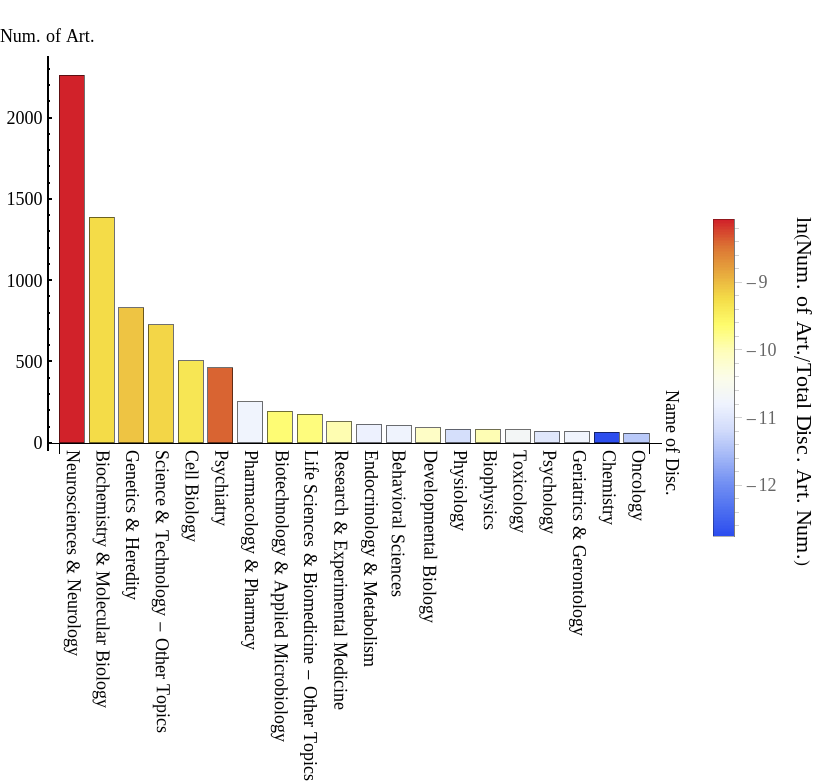
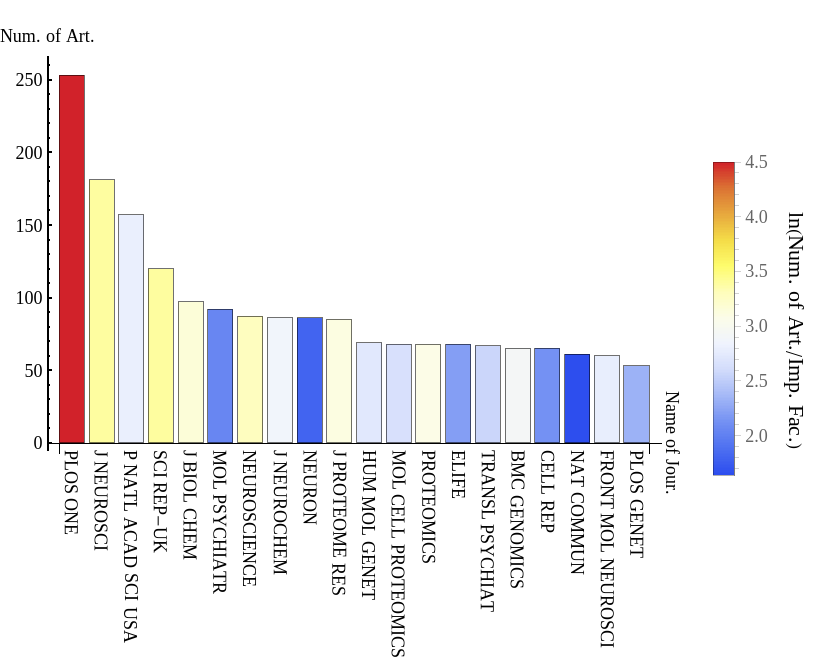

In [35]:
With[
{data=Take[Reverse@Sort@Counts@Flatten@StringSplit[data["SC"],"; "],20]},
VisualTemplate[
data,
BarChart,
"",
{Rot@"Name of Disc.","Num. of Art."},
"Monochrome",
ChartLabels->Placed[Map[Rot,Keys@data,1],Below],
ChartStyle->
Map[
ColorData[{"TemperatureMap",Log@MinMax@Divide[Values@data,Keys@data/.Dispatch@areascalerules]}],
Log@Divide[Values@data,Keys@data/.Dispatch@areascalerules]
],
LabelStyle->Directive[FontFamily->"TimesNewRoman"],
ChartLegends->
BarLegend[
{"TemperatureMap",Log@MinMax@Divide[Values@data,Keys@data/.Dispatch@areascalerules]},
LegendLabel->Placed[Rot@"ln(Num. of Art./Total Disc. Art. Num.)",Right]
],
ImageSize->421
]
]

Export["Fig1a.pdf",%]

With[
{data=Take[Reverse@Sort@Counts@data["J9"],20]},
VisualTemplate[
data,
BarChart,
"",
{Rot@"Name of Jour.","Num. of Art."},
"Monochrome",
ChartLabels->Placed[Map[Rot,Keys@data,1],Below],
ChartStyle->
Map[
ColorData[{"TemperatureMap",Log@MinMax@Divide[Values@data,Keys@data/.Dispatch@journalifrules]}],
Log@Divide[Values@data,Keys@data/.Dispatch@journalifrules]
],
LabelStyle->Directive[FontFamily->"TimesNewRoman"],
ChartLegends->
BarLegend[
{"TemperatureMap",Log@MinMax@Divide[Values@data,Keys@data/.Dispatch@journalifrules]},
LegendLabel->Placed[Rot@"ln(Num. of Art./Imp. Fac.)",Right]
],
ImageSize->421
]
]

Export["Fig1b.pdf",%]

### Analysis for multi-/trans-disciplinary properties

Magnify[-Graphics-]
Fig2a.pdf
Magnify[-Graphics-]
Fig2b.pdf
Magnify[Legended[-Graphics-, {Placed[SwatchLegend[{Directive[EdgeForm[Directive[
 
>           Thickness[Small], Opacity[0.658]]], RGBColor[0.761959, 0.470832, 0.940597]], 
 
>        Directive[EdgeForm[Directive[Thickness[Small], Opacity[0.658]]], 
 
>         RGBColor[0.875096, 0.658004, 0.746929]], 
 
>        Directive[EdgeForm[Directive[Thickness[Small], Opacity[0.658]]], 
 
>         RGBColor[0.944098, 0.795589, 0.594269]], 
 
>        Directive[EdgeForm[Directive[Thickness[Small], Opacity[0.658]]], 
 
>         RGBColor[0.953786, 0.937389, 0.6181]], 
 
>        Directive[EdgeForm[Directive[Thickness[Small], Opacity[0.658]]], 
 
>         RGBColor[0.795233, 0.898854, 0.830251]], 
 
>        Directive[EdgeForm[Directive[Thickness[Small], Opacity[0.658]]], 
 
>         RGBColor[0.431296, 0.709773, 0.927077]]}, 
 
>       {Multidisciplinary Sciences, Chemistry, Multidisciplinary, 
 
>        Psychology, Multidisciplinary, Physics, Multidisciplinary, 
 
>        Agriculture, Multidisciplinary, Materials Science, Multidisciplinary}, 
 
>       LegendMarkers -> 
 
>        {{Automatic, Automatic, Automatic, Automatic, Automatic, Automatic}}, 
 
>       LabelStyle -> 
 
>        {{Directive[FontFamily -> TimesNewRoman, FontColor -> GrayLevel[0]]}, 
 
>         {Directive[FontFamily -> TimesNewRoman, FontColor -> GrayLevel[0]]}}, 
 
>       LegendLayout -> Column], After, Identity]}]]
Fig2c.pdf
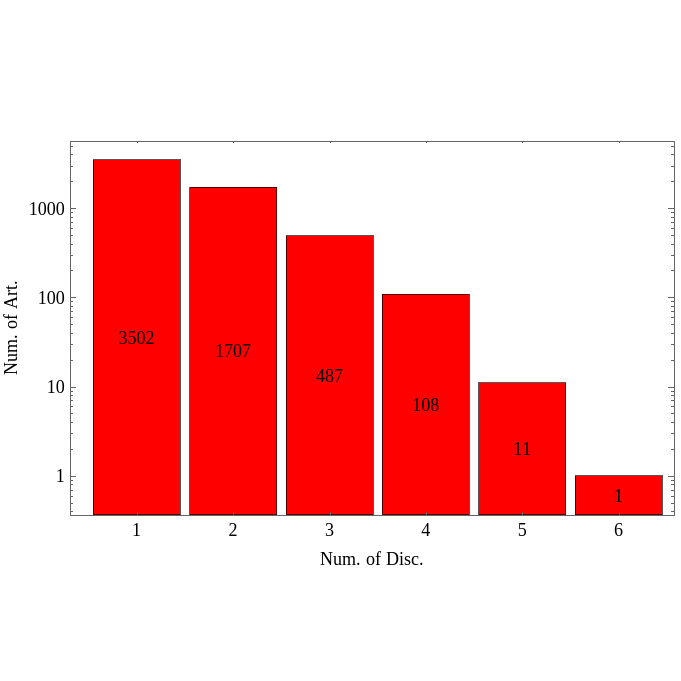
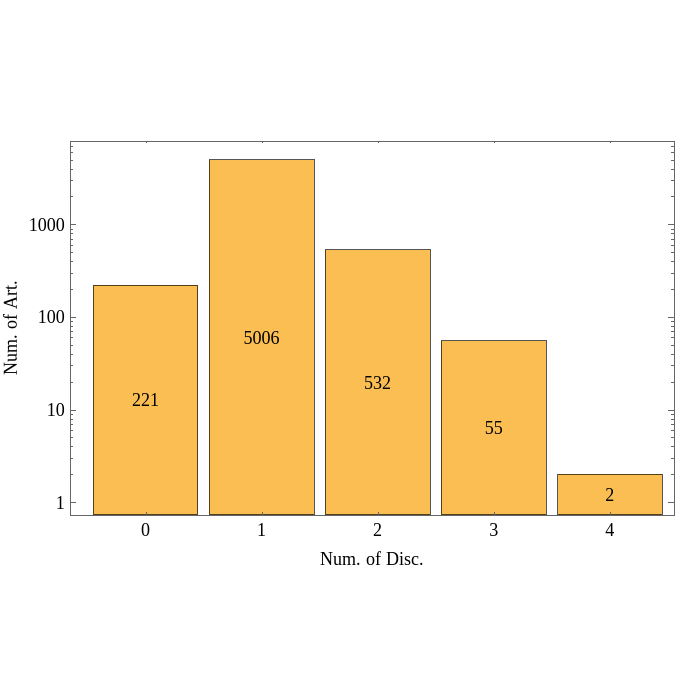
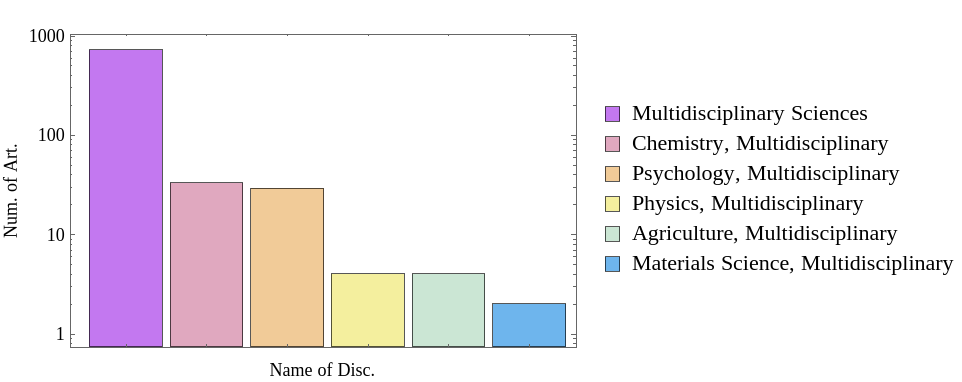

In [39]:
VisualTemplate[
Length/@StringSplit[data["WC"],"; "]//Counts//KeySort,
BarChart,
"",
{"Num. of Disc.","Num. of Art."},
"Scientific",
ChartStyle->Red,
ChartLabels->Automatic,
LabelingFunction->Center,
ScalingFunctions->"Log",
ImageSize->{421,421}
]

Export["Fig2a.pdf",%]

VisualTemplate[
Total[
Boole@StringContainsQ[StringJoin/@Transpose@Lookup[data,{"TI","AB","DE","ID"}],___~~#~~___,IgnoreCase->True]&/@
{"genom","transcriptom","proteom","metabolom","microbiom","connectom","interactom","lipidom","glycom"}
]//Counts//KeySort,
BarChart,
"",
{"Num. of Disc.","Num. of Art."},
"Scientific",
ChartLabels->Automatic,
LabelingFunction->Center,
ScalingFunctions->"Log",
ImageSize->{421,421}
]

Export["Fig2b.pdf",%]

VisualTemplate[
Reverse@Sort@Counts@Flatten@StringCases[Flatten@StringSplit[data["WC"],"; "],___~~"Multi"~~___],
BarChart,
"",
{"Name of Disc.","Num. of Art."},
"Scientific",
ChartStyle->"Pastel",
ChartLegends->Automatic,
ScalingFunctions->"Log"
]

Export["Fig2c.pdf",%]

Magnify[Legended[-Graphics-, {Placed[BarLegend[{SunsetColors, {0, 1}}, 
 
>       {LabelStyle -> 
 
>         Directive[FontFamily -> TimesNewRoman, FontColor -> GrayLevel[0]], 
 
                                                                           -Pi
>        LegendLabel -> Placed[Rotate[ln(Disc. Art. Num./Total Art. Num.), ---], Right], 
                                                                            2
 
                                                         360
>        LegendLayout -> Column, LegendMarkerSize -> -----------, 
                                                     GoldenRatio
 
>        Charting`TickSide -> Right, ColorFunctionScaling -> True}], After, Identity]}]]
Fig3b.pdf
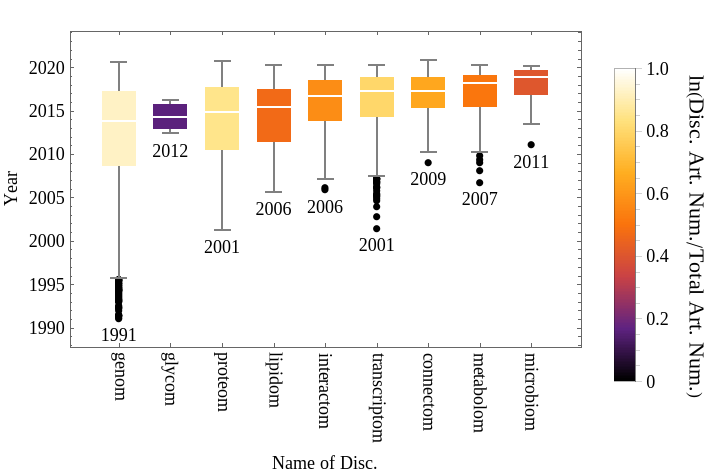

In [39]:
Block[
{query={"genom","transcriptom","proteom","metabolom","microbiom","connectom","interactom","lipidom","glycom"},asso},

asso=AssociationThread[Rule[query,StringContainsQ[StringJoin/@Transpose@Lookup[data,{"TI","AB","DE","ID"}],___~~#~~___,IgnoreCase->True]&/@query]];
asso=Association@Table[Rot@q->DateValue[ReplaceAll[f->If]@Thread[f[asso[q],date,Nothing]],"YearExact"],{q,query}];


VisualTemplate[
Style[#,ColorData["SunsetColors"][Rescale[Log[Length@#],{0,Log@Length@date}]]]&/@SortBy[asso,Median],
BoxWhiskerChart,
"",
{"Name of Disc.","Year"},
"Scientific",
"Outliers",
ChartLabels->Automatic,
FrameTicks->Automatic,
LabelingFunction->(Placed[Round@Min@#1,Below]&),
ChartLegends->BarLegend[{"SunsetColors",{0,1}},LegendLabel->Placed[Rot@"ln(Disc. Art. Num./Total Art. Num.)",Right]]
]
]

Export["Fig3b.pdf",%]